In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os
!pip install kagglehub

%matplotlib inline 

In [4]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

# Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

1. Crosstab Analysis:
- Create a crosstab between the product category and the isBestSeller status.
- Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

2. Statistical Tests:
- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.
3. Visualizations:
- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [6]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
# Agregamos proporción de True sobre el total por categoría
crosstab['proportion_best_seller'] = crosstab[True] / crosstab.sum(axis=1)

# Ordenamos
crosstab_sorted = crosstab.sort_values(by='proportion_best_seller', ascending=False)
crosstab_sorted

isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [8]:
crosstab.head()

isBestSeller,False,True,proportion_best_seller
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811


In [9]:
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [10]:
chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=36684.23786636857, pvalue=0.0, dof=590, expected_freq=array([[2.47193964e+02, 8.09882713e-01, 1.85076756e-04],
       [4.05371625e+03, 1.32812090e+01, 3.03506057e-03],
       [2.49203347e+02, 8.16466063e-01, 1.86581203e-04],
       [1.69145759e+03, 5.54173022e+00, 1.26641233e-03],
       [2.53182120e+02, 8.29501733e-01, 1.89560152e-04],
       [8.50215078e+03, 2.78556353e+01, 6.36565092e-03],
       [1.06659816e+02, 3.49450041e-01, 7.98573411e-05],
       [2.57176598e+02, 8.42588862e-01, 1.92550861e-04],
       [9.51783364e+03, 3.11833217e+01, 7.12610350e-03],
       [1.50008640e+04, 4.91473992e+01, 1.12313068e-02],
       [9.32544259e+03, 3.05529901e+01, 6.98205827e-03],
       [2.38244365e+02, 7.80561099e-01, 1.78376096e-04],
       [3.22941764e+03, 1.05805557e+01, 2.41789941e-03],
       [9.44704154e+03, 3.09513853e+01, 7.07310070e-03],
       [6.68808280e+03, 2.19121962e+01, 5.00743888e-03],
       [5.26284806e+02, 1.72426931e+00, 3.94035044e-04],
  

- Pvalue es 0, significa que como P es meno que 0.05 entonces no aceptamos HO y las variables son dependientes

In [11]:
crosstab.astype(int)

isBestSeller,False,True,proportion_best_seller
category,,,
3D Printers,247,1,0
3D Printing & Scanning,4065,2,0
Abrasive & Finishing Products,245,5,0
Action Cameras,1696,1,0
Adapters,251,3,0
...,...,...,...
Wind Instruments,243,7,0
Window Treatments,234,5,0
Women,17559,213,0


In [12]:
print(crosstab.dtypes)


isBestSeller
False                       int64
True                        int64
proportion_best_seller    float64
dtype: object


In [15]:
crosstab2 = pd.crosstab(df['category'], df['isBestSeller']) # Vuelvo a hacer el Crosstab para que no haya float del proportion_best_seller

In [17]:
from scipy.stats.contingency import association
association(crosstab2, method="cramer")

0.1222829439760564

- Relación muy débil, puede haber alguna asociación entre las variables pero no es muy fuerte

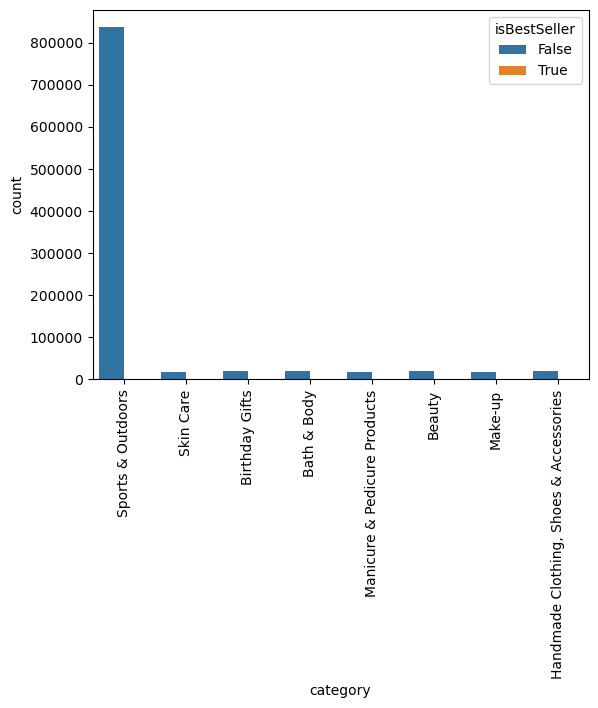

In [19]:
top_categories = df['category'].value_counts().nlargest(8).index # Contar las categorías más frecuentes
df_filtered = df[df['category'].isin(top_categories)] # Filtrar el df solo con las categorías más frecuentes

sns.countplot(data=df_filtered, x='category', hue='isBestSeller')
plt.xticks(rotation=90)
plt.show()

In [21]:
crosstab3 = pd.crosstab(df_filtered['category'], df_filtered['isBestSeller'])

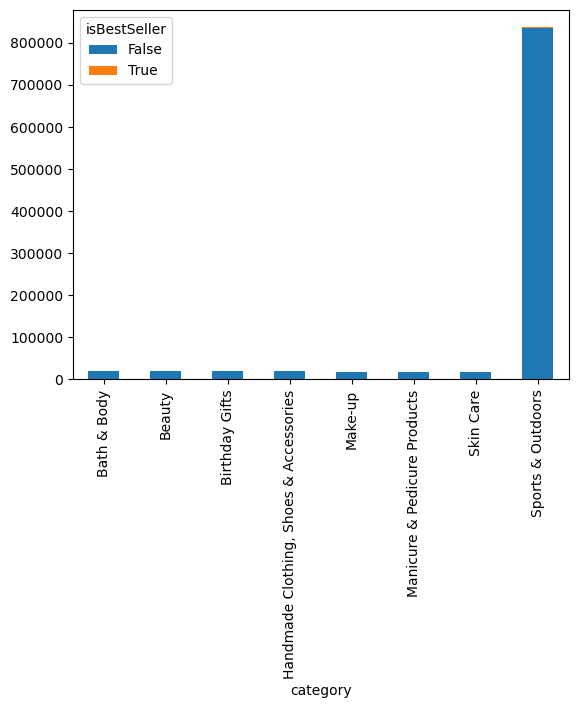

In [22]:
crosstab3.plot(kind="bar", stacked=True)
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

0. Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

1. Violin Plots:
- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
- Which product category tends to have the highest median price? Don't filter here by top categories.
2. Bar Charts:
- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.
3. Box Plots:
- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [23]:
# 1 Calcular los cuartiles y el IQR de los precios
Q1 = df['price'].quantile(0.25)  # Primer cuartil
Q3 = df['price'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# 2 Definir los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3 Filtrar el dataframe para eliminar los outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Ver cuántas filas se han eliminado
print(f"Filas eliminadas: {len(df) - len(df_filtered)}")

# Hacerlo con una función es exactamente lo mismo


Filas eliminadas: 327688


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8924\3035398984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")


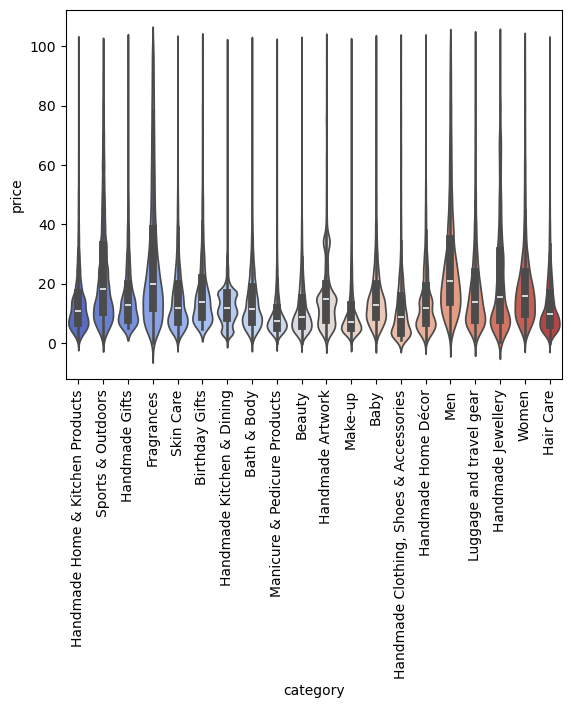

In [25]:
# Filtrar las 20 categorías más frecuentes
top_20_categories = df_filtered['category'].value_counts().head(20).index
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]


sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [26]:
median_prices = df_filtered.groupby('category')['price'].median()
median_prices.idxmax()

'Desktop PCs'

In [27]:
top_categories = df_filtered['category'].value_counts().nlargest(10).index

# Filtrar el DataFrame para esas categorías
df_top_categories = df_filtered[df_filtered['category'].isin(top_categories)]

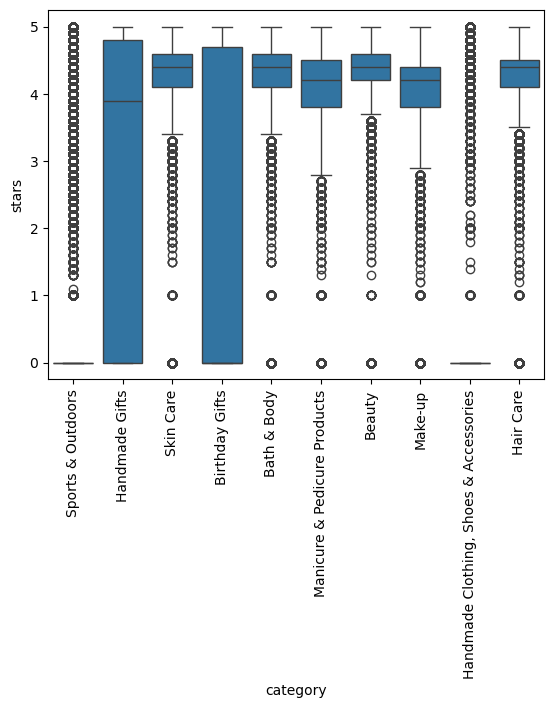

In [28]:
sns.boxplot(data=df_top_categories, x='category', y='stars')
plt.xticks(rotation=90)
plt.show()

In [29]:
# Agrupar por categoría y calcular la mediana del rating
median_ratings = df.groupby('category')['stars'].median().sort_values(ascending=False)

# Mostrar la categoría con mayor mediana
highest_median_category = median_ratings.idxmax()
highest_median_value = median_ratings.max()

print(f"La categoría con la mediana más alta de ratings es: {highest_median_category} ({highest_median_value} estrellas)")


La categoría con la mediana más alta de ratings es: Computer Memory (4.7 estrellas)


# Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

1. Correlation Coefficients:
- Calculate the correlation coefficient between price and stars.
- Is there a significant correlation between product price and its rating?
2. Visualizations:
- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.

Bonus:

Do the same analysis without taking out the outliers. What are your insights?

In [30]:
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214861

- Un coeficiente de correlación de -0.125 indica una correlación negativa débil entre el precio y las estrellas. Es decir, a medida que aumenta el precio, es poco probable que las estrellas (calificación) aumenten de manera consistente. No parece haber una fuerte relación entre el precio y la calificación en este conjunto de datos.

In [31]:
correlation_filtered = df_filtered['price'].corr(df['stars'])
correlation_filtered

-0.0776729987818137

In [32]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['price'], df['stars'])
print(f"Coeficiente de correlación: {correlation}")
print(f"Valor p: {p_value}")

Coeficiente de correlación: -0.12490673262148647
Valor p: 0.0


In [33]:
correlation_filtered, p_value = pearsonr(df_filtered['price'], df_filtered['stars'])
print(f"Coeficiente de correlación: {correlation_filtered}")
print(f"Valor p: {p_value}") 

Coeficiente de correlación: -0.07767299878181333
Valor p: 0.0


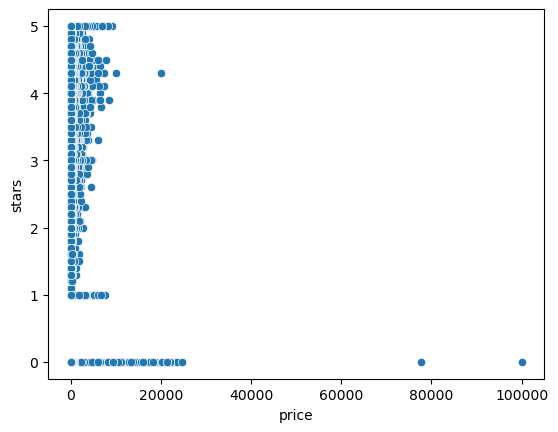

In [34]:
sns.scatterplot(data=df, x='price', y='stars')
plt.show()

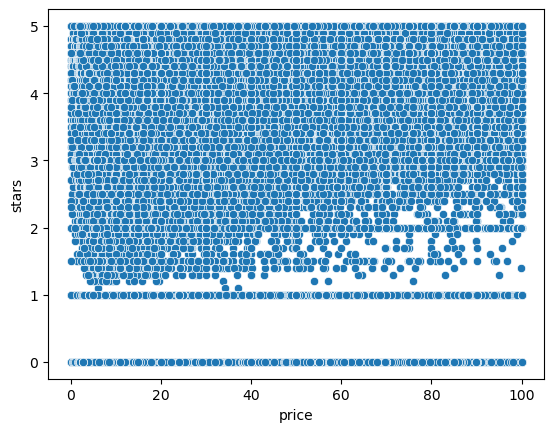

In [35]:
sns.scatterplot(data=df_filtered, x='price', y='stars')
plt.show()

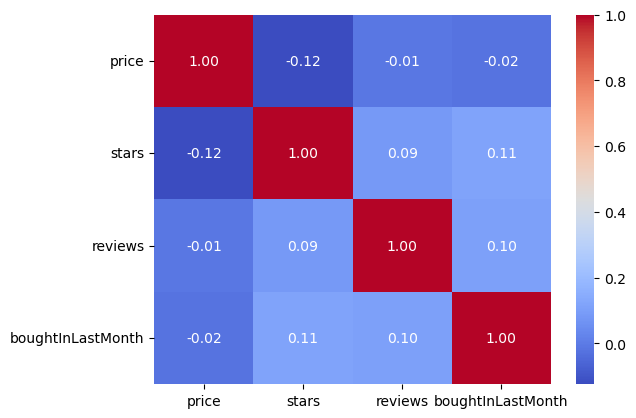

In [36]:
numeric_columns = df[['price', 'stars', 'reviews', 'boughtInLastMonth']]

# Calculamos la matriz de correlación
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()


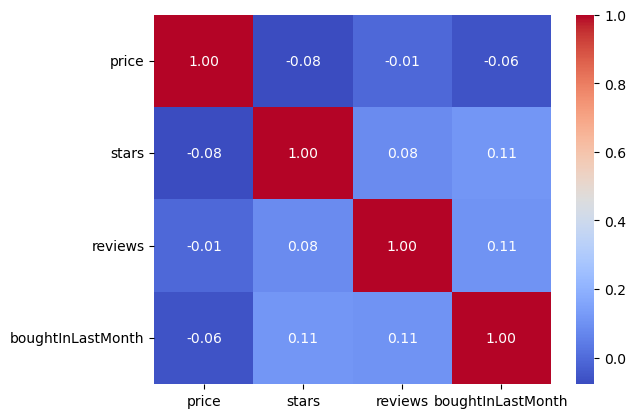

In [37]:
numeric_columns_2 = df_filtered[['price', 'stars', 'reviews', 'boughtInLastMonth']]

# Calculamos la matriz de correlación
correlation_matrix_2 = numeric_columns_2.corr()

sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

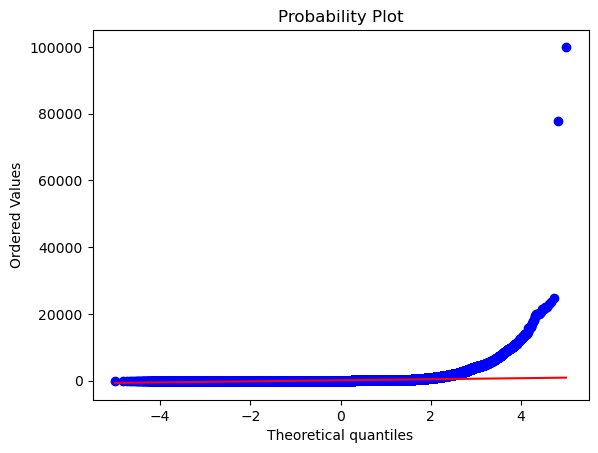

In [38]:
import scipy.stats as stats
stats.probplot(df['price'], dist="norm", plot=plt)
plt.show()

- Los puntos están alineados menos la parte final, hacia la cola de la izquierda

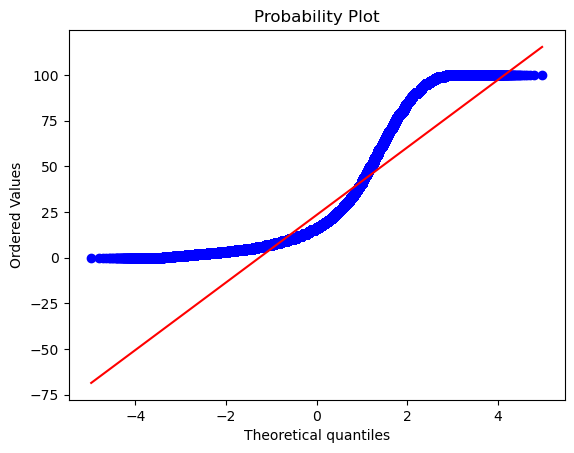

In [39]:
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.show()